In [1]:
import os
os.sys.path.append('..')

In [2]:
import warnings
warnings.simplefilter("ignore")

# autoreload import your package
%load_ext autoreload
%autoreload 2

In [3]:
from loguru import logger
logger.remove()
logger.add(os.sys.stdout, level="ERROR", colorize=True, format="<level>{time} | {message}</level>")
# import_dir(ta_dir, verbose=False)
warnings.simplefilter("ignore")

In [4]:
import torch
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Args

In [5]:
from run import set_seed, get_args, Exp_Main

In [7]:
# mimic cli args to avoid code duplication
argv = """python -u run.py \
  --root_path ../dataset/exchange_rate/ \
  --data_path exchange_rate.csv \
  --data custom \
  --checkpoints ./checkpoints/ \
  --model_id Exchange \
  --model ETSformer \
  --data custom \
  --features S \
  --seq_len 512 \
  --pred_len 96 \
  --e_layers 2 \
  --d_layers 2 \
  --d_model 512 \
  --d_ff 2048 \
  --n_heads 16 \
  --dropout 0.2 \
  --enc_in 1 \
  --c_out 1 \
  --num_workers 0 \
  --des 'Exp' \
  --K 0 \
  --learning_rate 3e-4 \
  --itr 1
"""
argv = argv.replace("\\n", "").split()[3:]
args = get_args(argv)
args


Exp = Exp_Main
ii=0
set_seed(ii)
# setting record of experiments
setting = '{}_{}_{}_ft{}_sl{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_K{}_lr{}_{}_{}'.format(
    args.model_id,
    args.model,
    args.data,
    args.features,
    args.seq_len,
    args.pred_len,
    args.d_model,
    args.n_heads,
    args.e_layers,
    args.d_layers,
    args.d_ff,
    args.K,
    args.learning_rate,
    args.des, ii)

# if os.path.exists(os.path.join(args.checkpoints, setting)):
#     print('skipping exists')
#     continue

exp = Exp(args)  # set experiments
print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
exp.train(setting)

print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
exp.test(setting, data='val')
exp.test(setting, data='test')

torch.cuda.empty_cache()

Args in experiment:
Namespace(K=0, activation='sigmoid', batch_size=32, c_out=1, checkpoints='./checkpoints/', d_ff=2048, d_layers=2, d_model=512, damping_learning_rate=0, data='custom', data_path='exchange_rate.csv', dec_in=7, des="'Exp'", devices='0,1,2,3', dropout=0.2, e_layers=2, embed='timeF', enc_in=1, features='S', freq='h', gpu=0, itr=1, label_len=0, learning_rate=0.0003, lradj='exponential_with_warmup', min_lr=1e-30, model='ETSformer', model_id='Exchange', n_heads=16, num_workers=0, optim='adam', output_attention=False, patience=5, pred_len=96, root_path='../dataset/exchange_rate/', seq_len=512, smoothing_learning_rate=0, std=0.2, target='OT', train_epochs=15, use_gpu=True, use_multi_gpu=False, warmup_epochs=3)
Use GPU: cuda:0
>>>>>>>start training : Exchange_ETSformer_custom_ftS_sl512_pl96_dm512_nh16_el2_dl2_df2048_K0_lr0.0003_'Exp'_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 4704
val 665
test 1422


  0%|          | 0/15 [00:00<?, ?epoch/s]

train:   0%|          | 0/147 [00:00<?, ?it/s]

Epoch: 1, Steps: 147 | Train Loss: 0.3748532 Vali Loss: 0.1615645 Test Loss: 0.0973958
Validation loss decreased (inf --> 0.161564).  Saving model ...
Updating learning rate to 7.5e-05


train:   0%|          | 0/147 [00:00<?, ?it/s]

Epoch: 2, Steps: 147 | Train Loss: 0.2502263 Vali Loss: 0.1444328 Test Loss: 0.0987149
Validation loss decreased (0.161564 --> 0.144433).  Saving model ...
Updating learning rate to 0.00015


train:   0%|          | 0/147 [00:00<?, ?it/s]

Epoch: 3, Steps: 147 | Train Loss: 0.2464321 Vali Loss: 0.1438236 Test Loss: 0.0948109
Validation loss decreased (0.144433 --> 0.143824).  Saving model ...
Updating learning rate to 0.000225


train:   0%|          | 0/147 [00:00<?, ?it/s]

Epoch: 4, Steps: 147 | Train Loss: 0.2674658 Vali Loss: 0.1382710 Test Loss: 0.1000110
Validation loss decreased (0.143824 --> 0.138271).  Saving model ...
Updating learning rate to 0.0003


train:   0%|          | 0/147 [00:00<?, ?it/s]

Epoch: 5, Steps: 147 | Train Loss: 0.2459421 Vali Loss: 0.1538529 Test Loss: 0.0921839
EarlyStopping counter: 1 out of 5
Updating learning rate to 0.00015


train:   0%|          | 0/147 [00:00<?, ?it/s]

Epoch: 6, Steps: 147 | Train Loss: 0.2457922 Vali Loss: 0.1407998 Test Loss: 0.0951631
EarlyStopping counter: 2 out of 5
Updating learning rate to 7.5e-05


train:   0%|          | 0/147 [00:00<?, ?it/s]

Epoch: 7, Steps: 147 | Train Loss: 0.2461400 Vali Loss: 0.1385264 Test Loss: 0.0990372
EarlyStopping counter: 3 out of 5
Updating learning rate to 3.75e-05


train:   0%|          | 0/147 [00:00<?, ?it/s]

Epoch: 8, Steps: 147 | Train Loss: 0.2535853 Vali Loss: 0.1401822 Test Loss: 0.0943378
EarlyStopping counter: 4 out of 5
Updating learning rate to 1.875e-05


train:   0%|          | 0/147 [00:00<?, ?it/s]

Epoch: 9, Steps: 147 | Train Loss: 0.2532325 Vali Loss: 0.1394154 Test Loss: 0.0949533
EarlyStopping counter: 5 out of 5
Early stopping
>>>>>>>testing : Exchange_ETSformer_custom_ftS_sl512_pl96_dm512_nh16_el2_dl2_df2048_K0_lr0.0003_'Exp'_0<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
val 665
loading model


  0%|          | 0/20 [00:00<?, ?it/s]

test shape: (20, 32, 96, 1) (20, 32, 96, 1)
test shape: (640, 96, 1) (640, 96, 1)
mse:0.13797499239444733, mae:0.29500773549079895
test 1422
loading model


  0%|          | 0/44 [00:00<?, ?it/s]

test shape: (44, 32, 96, 1) (44, 32, 96, 1)
test shape: (1408, 96, 1) (1408, 96, 1)
mse:0.10001101344823837, mae:0.2315286099910736


In [23]:
exp.model

ETSformer(
  (enc_embedding): ETSEmbedding(
    (conv): Conv1d(1, 512, kernel_size=(3,), stride=(1,), padding=(2,), bias=False)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (encoder): Encoder(
    (layers): ModuleList(
      (0): EncoderLayer(
        (growth_layer): GrowthLayer(
          (in_proj): Linear(in_features=512, out_features=512, bias=True)
          (es): ExponentialSmoothing(
            (dropout): Dropout(p=0.2, inplace=False)
          )
          (out_proj): Linear(in_features=512, out_features=512, bias=True)
        )
        (seasonal_layer): FourierLayer()
        (level_layer): LevelLayer(
          (es): ExponentialSmoothing(
            (dropout): Dropout(p=0.2, inplace=False)
            (aux_dropout): Dropout(p=0.2, inplace=False)
          )
          (growth_pred): Linear(in_features=512, out_features=1, bias=True)
          (season_pred): Linear(in_features=512, out_features=1, bias=True)
        )
        (ff): Feedforward(
          (linear1): Linea

# Plot

In [24]:
setting

"Exchange_ETSformer_custom_ftS_sl512_pl96_dm512_nh16_el2_dl2_df2048_K0_lr0.0003_'Exp'_0"

In [25]:
ds, dl = exp._get_data('test')

test 1422


In [26]:
preds, trues = exp.test(setting, data='test')

test 1422
loading model


  0%|          | 0/44 [00:00<?, ?it/s]

test shape: (44, 32, 96, 1) (44, 32, 96, 1)
test shape: (1408, 96, 1) (1408, 96, 1)
mse:0.09427478909492493, mae:0.23262830078601837


In [27]:
%matplotlib inline

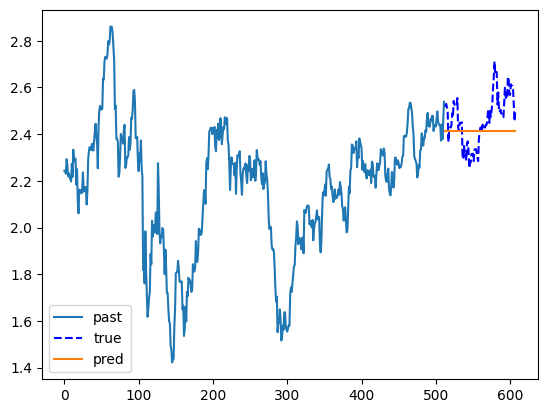

In [28]:
i=99
(batch_x, batch_y, batch_x_mark, batch_y_mark)  = ds[i]
l1 = batch_x.shape[0]
l2 = batch_y.shape[0]
plt.plot(range(l1), batch_x[:, -1], label='past')
plt.plot(range(l1, l1+l2), batch_y[:, -1], color='blue', ls='--', label='true')
plt.plot(range(l1, l1+l2), preds[i], label='pred');
plt.legend(loc='lower left')

# TODO check index

- s_end = index + self.seq_len
- r_begin = index + self.seq_len - self.label_len
- r_end = index + self.seq_len + self.pred_len

In [ ]:
f = ds.root_path + '/' + ds.data_path
df = pd.read_csv(f).set_index('date', drop=False)
df = df[ds.cols[1:]]
# df[:] = ds.scaler.transform(df.values)
df
# df

In [ ]:
from data_provider.data_loader import Dataset_Custom
ds2 = Dataset_Custom(
    ds.root_path,
    flag="test",
#     size=ds.size,
    size=[ds.seq_len, ds.label_len, ds.pred_len],
    features=ds.features,
    data_path=ds.data_path,
    target=ds.target,
    scale=False,
    timeenc=ds.timeenc,
    freq=ds.freq
)

i=99
(batch_x, batch_y, batch_x_mark, batch_y_mark)  = ds2[i]
batch_x[-1]

In [ ]:
dt = ds2.index.iloc[i-1]
df.loc[dt]

In [ ]:
assert df.loc[dt].close == batch_x[-1, 0], 'index should be right'
'OK'